# Lab 3 (1/27): ggplot

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu
    

## Installing R and the Jupyter Notebook

There seems to have been an issue with the version of R that is installed with conda. So if you want to run the jupyter notebooks on your local computer, you will need to install and connect the regular version of R.

The process for this is:

1. If necessary, uninstall the R installed by conda. You can do this through the Navigator by clicking Environments -> searching for r-base, clicking the checkmark -> Mark for removal, then clicking apply.
2. Install R from https://www.r-project.org/. You may have an existing installation from 250 or another class, but reinstalling is the easiest solution since it should fix any paths that were changed by conda.
3. Open R and run
    ```
    install.packages(c('IRkernel', 'tidyverse'))
    ```
    
4. On OSX, Open Terminal (command-space, type `Terminal`), then type `R` and hit enter to open an R prompt.

    On Windows, open Anaconda Prompt (or the console from the Anaconda Navigator). Navigate to the location of `R.exe`, then paste the path to this file in quotes to the console. If you used the default installation settings it should be something like
    ```
    "C:\Program Files\R\R-3.6.2\bin\x64\R.exe"
    ```
    Then hit enter to open an R prompt.
    
    Once you have an R prompt open, run 
    ```
    library(IRkernel)
    installspec()
    ```
    
Now you should be able to open jupyter notebooks and set the kernel to R. To check, open a notebook and go to Kernel->Change kernel.

## ggplot

In [ ]:
# options(repr.plot.width=10, repr.plot.height=8)

require(tidyverse)

Remember that we can create plots using the ```ggplot``` command. Simple plots are defined by two main components, the **aesthetic mapping** to use, and the **geometric objects** to include.

In [ ]:
ggplot(data=diamonds, aes(x=carat, y=price, color=clarity)) + 
    geom_point(alpha=0.5) +
    labs(x='Carats', y='Price($)') + 
    ggtitle('Diamond price by carat count')

### Aesthetic mappings
Aesthetics define how we map variables to features of the plot. Common examples:

* Position (x, y coordinates)
* Color
* Fill (‘inside’ coloring)
* Shape
* Linetype
* Size

Note that aesthetic mappings for each subcomponent of the plot are inherited from the default aesthetic but can also be applied or overwritten for specific pieces.

### Geometric objects
Geometric objects define the marks that we want on the plot. Each `geom_` object will have certain `aes` arguments that it requires or can use. Examples:

* `geom_point` for scatter plots
* `geom_line` for line plots
* `geom_boxplot`
* `geom_bar` for bar plots
* `geom_histogram`
* `geom_hline`, `geom_vline`, `geom_abline`
* `geom_text`

They will generally also take additional arguments that you can use to change their behavior.

### ggplot documentation

<https://ggplot2.tidyverse.org/reference>

This should be your first reference anytime you have questions about how to use a function or are using a function for the first time.

Example: <https://ggplot2.tidyverse.org/reference/geom_bar.html>

In [ ]:
head(diamonds)
print(nrow(diamonds))

### geom_bar

In [ ]:
# Default behavior
ggplot(data=diamonds, aes(x=color, fill=cut)) + 
    geom_bar()

In [ ]:
# Changing behavior by changing an argument
ggplot(diamonds, aes(x=color, fill=cut)) + 
    geom_bar(position='dodge')

In [ ]:
# Accessing computed variables
ggplot(diamonds, aes(x=color, fill=cut)) + 
    geom_bar(aes(y=..count../sum(..count..))) +
    xlab('Color') + ylab('Proportion') + ggtitle('Histogram of Diamonds')

### geom_point

In [ ]:
# Default behavior
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point()

In [ ]:
# Manually specifying an aesthetic
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(color='blue')

In [ ]:
# Using different data and mappings for an object
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(color='grey') +
    geom_point(data=filter(diamonds, cut=='Fair'), aes(color=clarity))

### Trend lines

A particularly useful object to include is `geom_smooth`, which adds smoothed trend lines to your plot.

Documentation: <https://ggplot2.tidyverse.org/reference/geom_smooth.html>


In [ ]:
# Sample 1200 rows
set.seed(3543)
rand_idx = sample(1:nrow(diamonds), 1200)
dm = diamonds[rand_idx, ]
dim(dm)
head(dm)

In [ ]:
ggplot(dm, aes(x=carat, y=price)) +
    geom_point() +
    geom_smooth()

In [ ]:
ggplot(dm, aes(x=carat, y=price)) +
    geom_point() +
    geom_smooth(se=FALSE)

### Other layer types

Other layers can be added onto a plot to change various behaviors or add additional components.

- `stat_` functions are usually similar to `geom_` functions, simply named to emphasize their statistical operations. Many `geom_` functions connect to underlying `stat_` functions (e.g. `geom_bar` and `stat_count`.
- `scale_` functions change how aesthetics transform variables into features. Some use cases:
  - Changing the color scheme used ([examples](https://ggplot2.tidyverse.org/reference/scale_manual.html)).
  - Switching to a log or other scale ([examples](https://ggplot2.tidyverse.org/reference/scale_continuous.html)).
  - Reversing the direction of a scale ([examples](https://ggplot2.tidyverse.org/reference/scale_continuous.html)).
  - Changing the labels in a legend.
- `facet_` subsetting to multiple plots.
- `coord_` changing the coordinate systems
- `theme_` changing the visuals of the plot.

### Facets

Facets let us easily create multiple plots based on subsets of the data. We will primarily use two functions to facet our plots, `facet_wrap` and `face_grid`.

In [ ]:
ggplot(data=diamonds, aes(x=x, y=price)) + 
    geom_point() +
    facet_wrap(~ cut, nrow=2)

In [ ]:
ggplot(data=diamonds, aes(x=x, y=price)) + 
    geom_point() +
    facet_grid(color ~ cut) 

### Scale transformations

Scale transformations allow us to modify how the axes of the plot are scaled or presented.

In [ ]:
ggplot(dm, aes(x=carat, y=price)) +
    geom_point()

In [ ]:
ggplot(dm, aes(x=carat, y=price)) +
    geom_point() +
    scale_y_reverse()

In [ ]:
ggplot(dm, aes(x=carat, y=price)) +
    geom_point() +
    scale_x_log10() + scale_y_log10()

### Exercise 1:

Using the dataset `dm`:

1. Notice the warning that `geom_smooth() using method = 'gam'`. Look up the [documentation](https://ggplot2.tidyverse.org/reference/geom_smooth.html). What other methods can be used? Try a different method, do you see any differences?
2. Try making separate plots with a smoothing line for each value of the `cut` variable. Remember faceting. What method does `geom_smooth` use by default now? Why?

### Exercise 2

Using the dataset `dm`, replicate the following plots, one which colors each cut and the associated fit line, and another which separates each cut and associated fit line using facetting. Note the straight (or linear) fit lines, which method do you need to choose to get these? Which plot do you prefer?

<table> <div>
    <tr>
        <td> 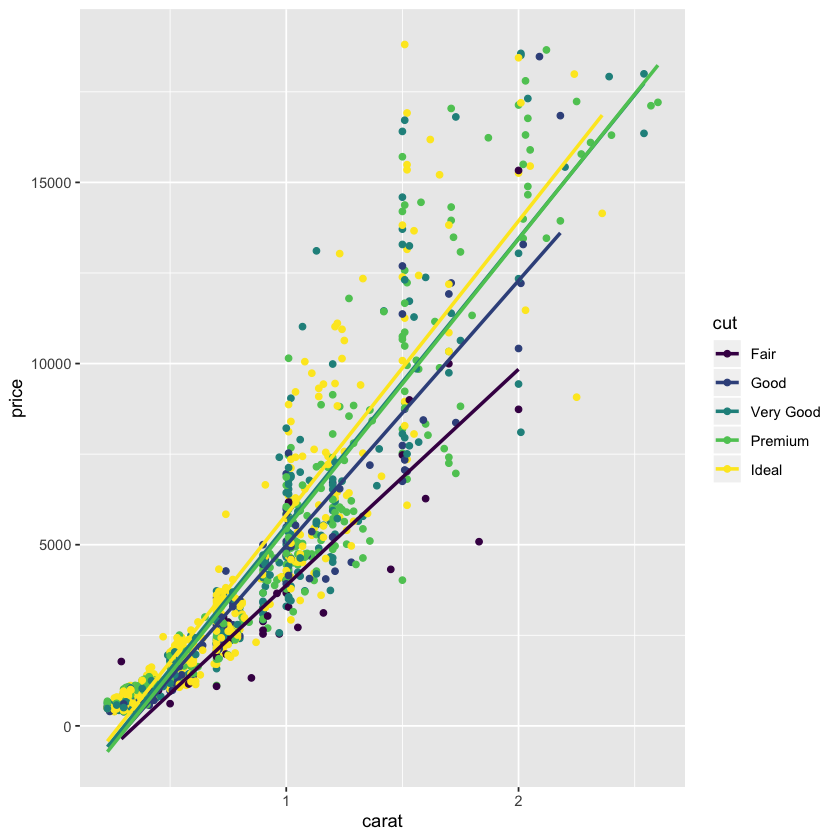 </td>
        <td> 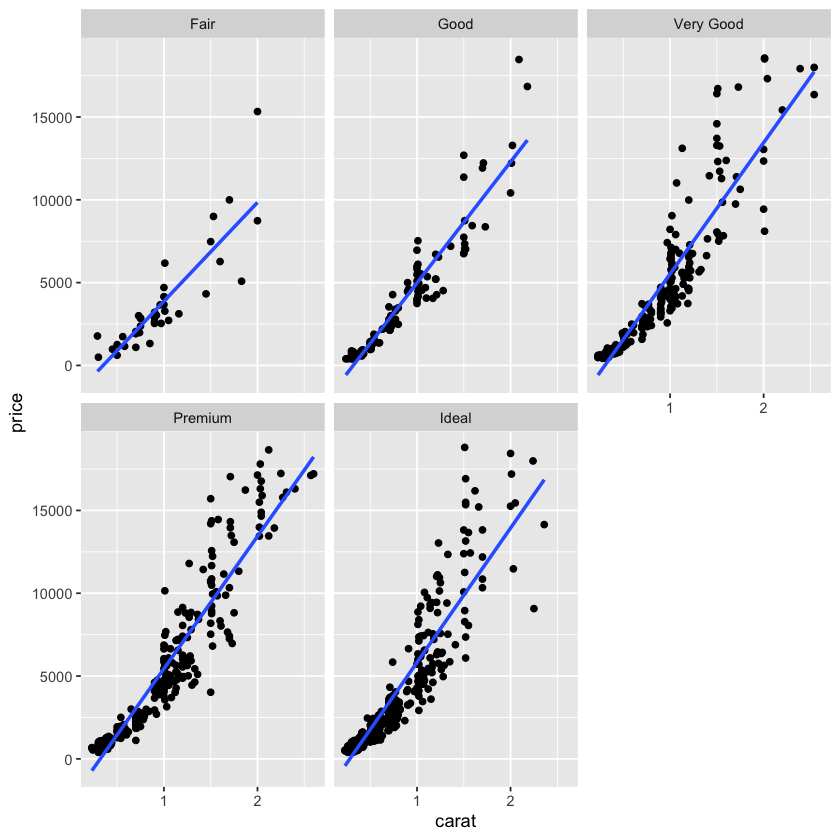 </td>
    </tr>
</div> </table>


### Exercise 3

Plot the centers of each US state by their latitude and longitude. Size the dots according to each state’s population. Label the states with their two-letter abbreviation. If you can, make North face down. In other words, replicate the plot below. The code below will create the proper dataset to use, which will have fields:
- `x`: Longitude
- `y`: Latitude
- `abb`: State Abbreviation
- `Population`
- `Region`

You may want to look at the documentation for `geom_point` and `geom_text`.

<div>
    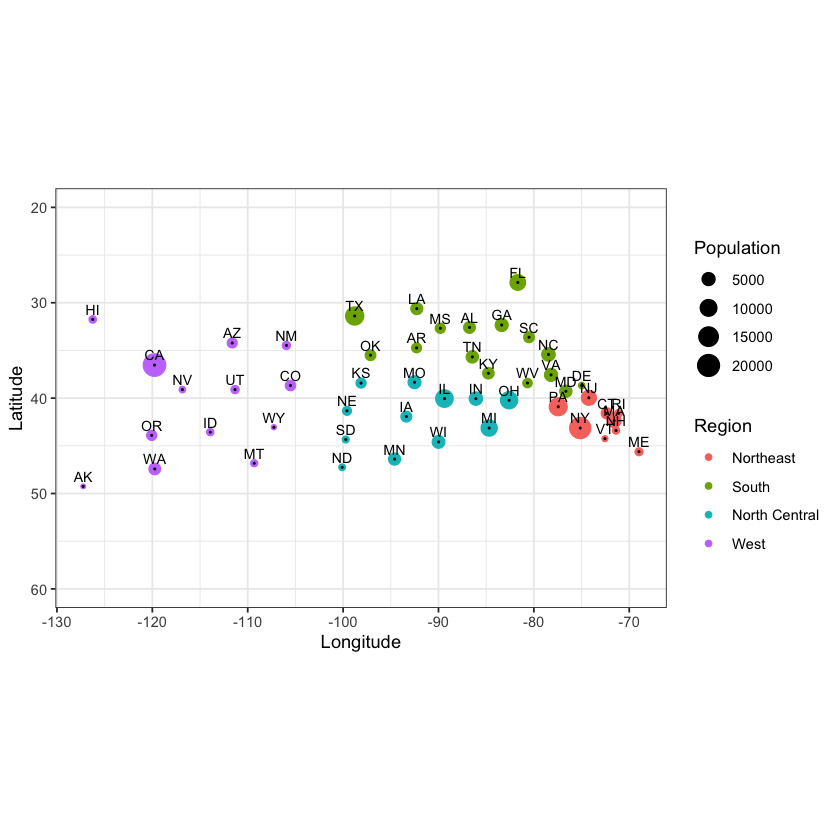
</div>

In [ ]:
data(state)
data_state = data.frame(
    x=state.center$x, y=state.center$y, abb=state.abb,
    Population=as.data.frame(state.x77)$Population, Region=state.region)